In [1]:
# This mounts your Google Drive to the Colab VM.
from google.colab import drive
drive.mount('/content/drive')

# TODO: Enter the foldername in your Drive where you have saved the unzipped
# assignment folder, e.g. 'cs231n/assignments/assignment1/'
FOLDERNAME = '/mnist/src/'
assert FOLDERNAME is not None, "[!] Enter the foldername."

# Now that we've mounted your Drive, this ensures that
# the Python interpreter of the Colab VM can load
# python files from within it.
import sys
sys.path.append('/content/drive/My Drive/{}'.format(FOLDERNAME))

Mounted at /content/drive


In [27]:
import torch
from torchvision import transforms
from PIL import Image
import matplotlib.pyplot as plt

In [28]:
# 加载模型
model_path_epoch3 = "/content/drive/MyDrive/mnist/src/checkpoints/model_3epochs_mnist.pth"
model_path_epoch10 = "/content/drive/MyDrive/mnist/src/checkpoints/model_10epochs_mnist.pth"

In [29]:
# 加载网络
# 初步网络
class MyNet(torch.nn.Module):
  def __init__(self):
    super(MyNet, self).__init__()
    self.conv1 = torch.nn.Sequential(
        torch.nn.Conv2d(1, 10, kernel_size=5),
        torch.nn.ReLU(),
        torch.nn.MaxPool2d(kernel_size=2),
    )
    self.conv2 = torch.nn.Sequential(
        torch.nn.Conv2d(10, 20, kernel_size=5),
        torch.nn.ReLU(),
        torch.nn.MaxPool2d(kernel_size=2),
    )
    self.fc = torch.nn.Sequential(
        torch.nn.Linear(320, 50),
        torch.nn.Linear(50, 10),
    )
  def forward(self, x):
    batch_size = x.size(0)
    x = self.conv1(x)
    x = self.conv2(x)
    x = x.view(batch_size, -1) # 展平
    x = self.fc(x)
    return x

model_path_epoch3_MyNet = MyNet()
model_path_epoch10_MyNet = MyNet()
print(model_path_epoch3_MyNet)
print(model_path_epoch10_MyNet)

MyNet(
  (conv1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(5, 5), stride=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv2): Sequential(
    (0): Conv2d(10, 20, kernel_size=(5, 5), stride=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (fc): Sequential(
    (0): Linear(in_features=320, out_features=50, bias=True)
    (1): Linear(in_features=50, out_features=10, bias=True)
  )
)
MyNet(
  (conv1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(5, 5), stride=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv2): Sequential(
    (0): Conv2d(10, 20, kernel_size=(5, 5), stride=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (fc): Sequential(
    (0): Linear(in_features=320, out_features=50, bias=True)
    (1): Linear(

In [30]:
# 加载并预处理图片
def prepare_image(image_path):
  transform = transforms.Compose([
      transforms.Grayscale(),
      transforms.Resize((28, 28)),
      transforms.ToTensor(),
      transforms.Normalize((0.1307,), (0.3081,)),
  ])
  image = Image.open(image_path)
  image = transform(image).unsqueeze(0) # 增加了一个维度 源图像只有(channels, height, width) ,这里加了一个batchsize变成模型期望的样子
  return image

In [31]:
# 预测图片的数字
def predict(image_path, model):
  image = prepare_image(image_path)
  with torch.no_grad():
    outputs = model(image)
    _, predicted = torch.max(outputs.data, 1)
  return predicted.item()

In [32]:
# 用跑了3个epochs的model来跑
model_path_epoch3_MyNet.load_state_dict(torch.load(model_path_epoch3))
model_path_epoch3_MyNet.eval()
# 用跑了10个epochs的model来跑
model_path_epoch10_MyNet.load_state_dict(torch.load(model_path_epoch10))
model_path_epoch10_MyNet.eval()

<ipython-input-32-289d0898d187>:2: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model_path_epoch3_MyNet.load_state_dict(torch.load(model_path_epoch3))
<ipython-input-32-289

MyNet(
  (conv1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(5, 5), stride=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv2): Sequential(
    (0): Conv2d(10, 20, kernel_size=(5, 5), stride=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (fc): Sequential(
    (0): Linear(in_features=320, out_features=50, bias=True)
    (1): Linear(in_features=50, out_features=10, bias=True)
  )
)

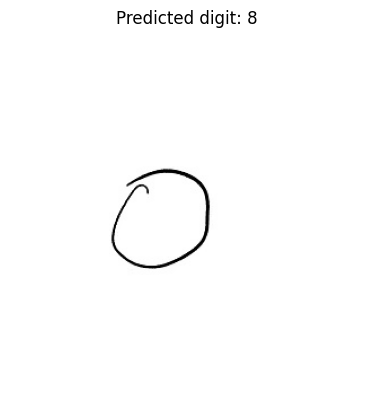

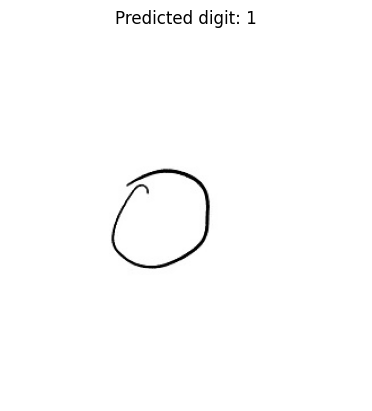

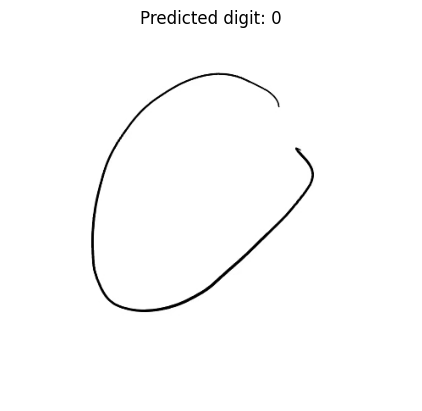

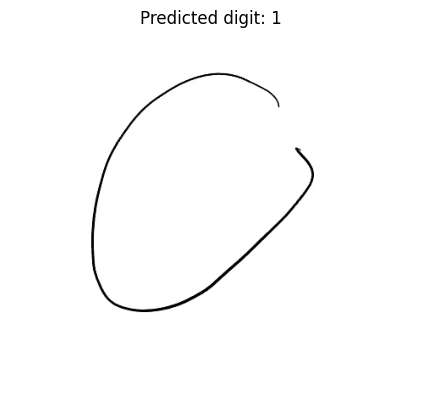

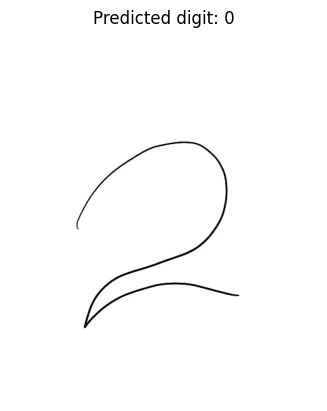

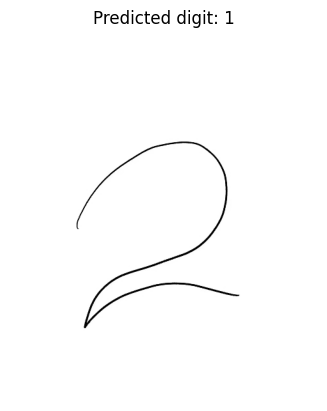

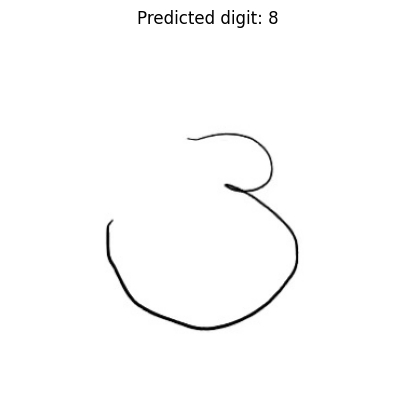

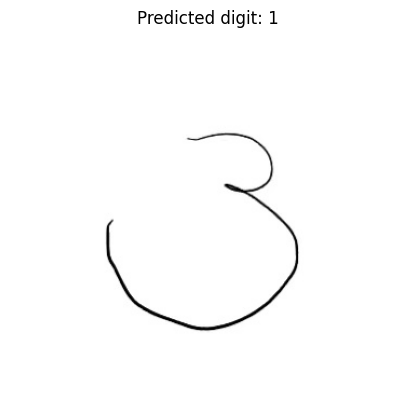

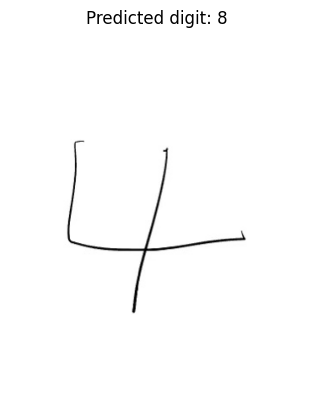

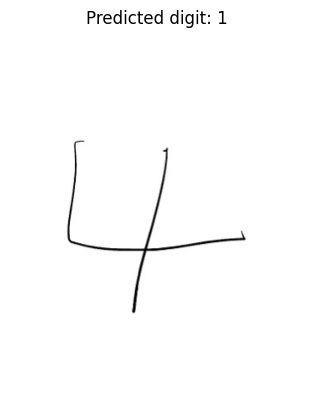

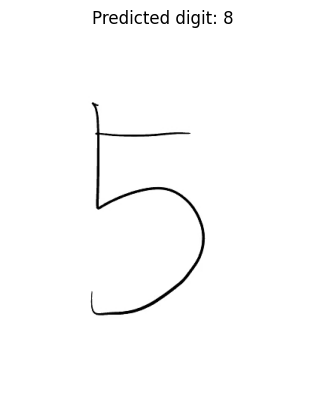

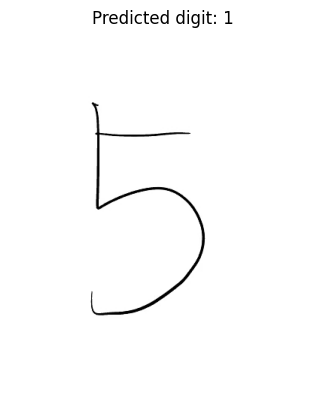

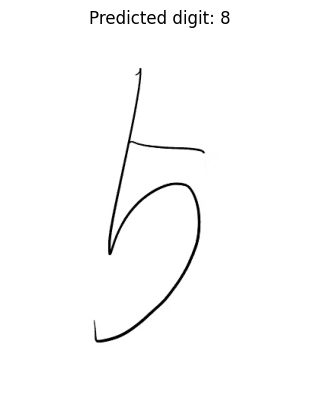

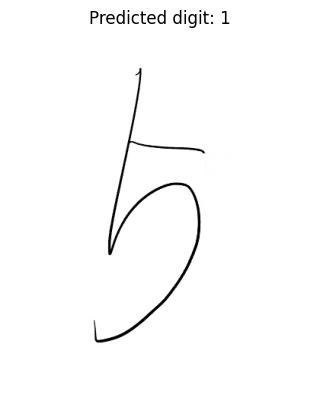

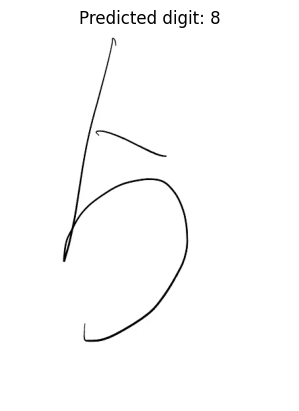

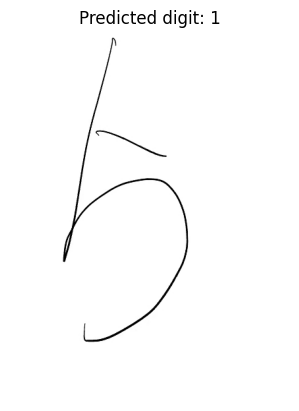

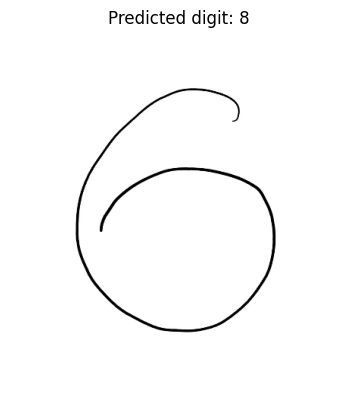

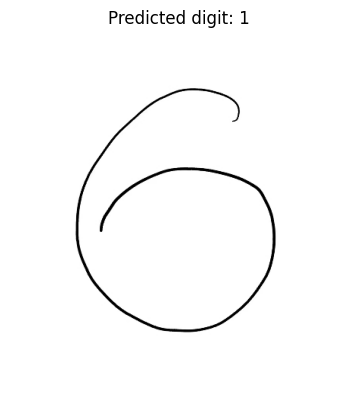

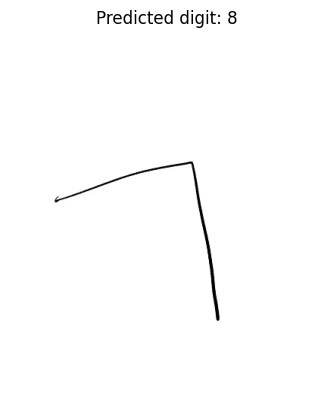

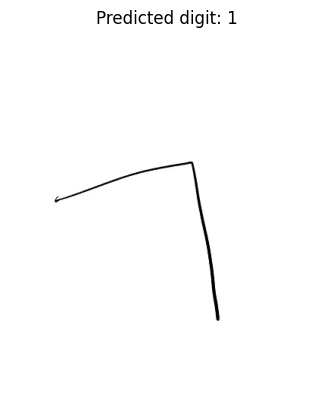

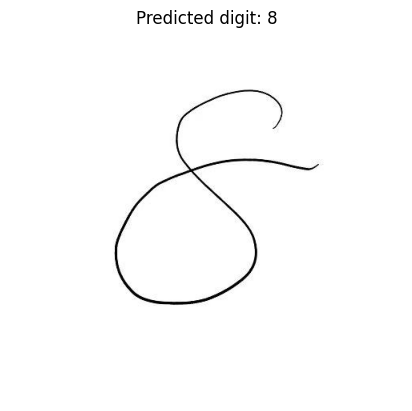

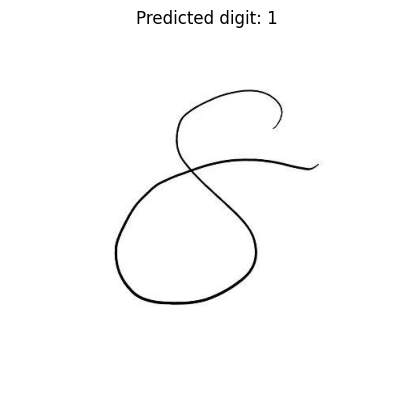

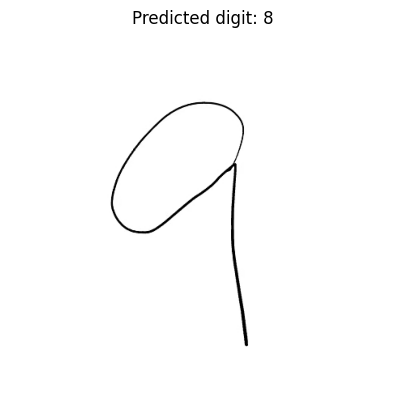

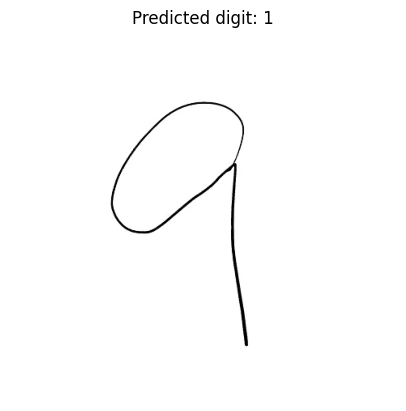

In [33]:
image_path = "/content/drive/MyDrive/mnist/src/images/image_0_1.jpg"
predicted_digit_from_epoch3 = predict(image_path, model_path_epoch3_MyNet)
predicted_digit_from_epoch10 = predict(image_path, model_path_epoch10_MyNet)

image = Image.open(image_path)
plt.imshow(image, cmap='gray')
plt.title(f"Predicted digit: {predicted_digit_from_epoch3}")
plt.axis('off')
plt.show()

image = Image.open(image_path)
plt.imshow(image, cmap='gray')
plt.title(f"Predicted digit: {predicted_digit_from_epoch10}")
plt.axis('off')
plt.show()

image_path = "/content/drive/MyDrive/mnist/src/images/image_0_2.jpg"
predicted_digit_from_epoch3 = predict(image_path, model_path_epoch3_MyNet)
predicted_digit_from_epoch10 = predict(image_path, model_path_epoch10_MyNet)

image = Image.open(image_path)
plt.imshow(image, cmap='gray')
plt.title(f"Predicted digit: {predicted_digit_from_epoch3}")
plt.axis('off')
plt.show()

image = Image.open(image_path)
plt.imshow(image, cmap='gray')
plt.title(f"Predicted digit: {predicted_digit_from_epoch10}")
plt.axis('off')
plt.show()

image_path = "/content/drive/MyDrive/mnist/src/images/image_2_1.jpg"
predicted_digit_from_epoch3 = predict(image_path, model_path_epoch3_MyNet)
predicted_digit_from_epoch10 = predict(image_path, model_path_epoch10_MyNet)

image = Image.open(image_path)
plt.imshow(image, cmap='gray')
plt.title(f"Predicted digit: {predicted_digit_from_epoch3}")
plt.axis('off')
plt.show()

image = Image.open(image_path)
plt.imshow(image, cmap='gray')
plt.title(f"Predicted digit: {predicted_digit_from_epoch10}")
plt.axis('off')
plt.show()

image_path = "/content/drive/MyDrive/mnist/src/images/image_3_1.jpg"
predicted_digit_from_epoch3 = predict(image_path, model_path_epoch3_MyNet)
predicted_digit_from_epoch10 = predict(image_path, model_path_epoch10_MyNet)

image = Image.open(image_path)
plt.imshow(image, cmap='gray')
plt.title(f"Predicted digit: {predicted_digit_from_epoch3}")
plt.axis('off')
plt.show()

image = Image.open(image_path)
plt.imshow(image, cmap='gray')
plt.title(f"Predicted digit: {predicted_digit_from_epoch10}")
plt.axis('off')
plt.show()

image_path = "/content/drive/MyDrive/mnist/src/images/image_4_1.jpg"
predicted_digit_from_epoch3 = predict(image_path, model_path_epoch3_MyNet)
predicted_digit_from_epoch10 = predict(image_path, model_path_epoch10_MyNet)

image = Image.open(image_path)
plt.imshow(image, cmap='gray')
plt.title(f"Predicted digit: {predicted_digit_from_epoch3}")
plt.axis('off')
plt.show()

image = Image.open(image_path)
plt.imshow(image, cmap='gray')
plt.title(f"Predicted digit: {predicted_digit_from_epoch10}")
plt.axis('off')
plt.show()

image_path = "/content/drive/MyDrive/mnist/src/images/image_5_1.jpg"
predicted_digit_from_epoch3 = predict(image_path, model_path_epoch3_MyNet)
predicted_digit_from_epoch10 = predict(image_path, model_path_epoch10_MyNet)

image = Image.open(image_path)
plt.imshow(image, cmap='gray')
plt.title(f"Predicted digit: {predicted_digit_from_epoch3}")
plt.axis('off')
plt.show()

image = Image.open(image_path)
plt.imshow(image, cmap='gray')
plt.title(f"Predicted digit: {predicted_digit_from_epoch10}")
plt.axis('off')
plt.show()

image_path = "/content/drive/MyDrive/mnist/src/images/image_5_2.jpg"
predicted_digit_from_epoch3 = predict(image_path, model_path_epoch3_MyNet)
predicted_digit_from_epoch10 = predict(image_path, model_path_epoch10_MyNet)

image = Image.open(image_path)
plt.imshow(image, cmap='gray')
plt.title(f"Predicted digit: {predicted_digit_from_epoch3}")
plt.axis('off')
plt.show()

image = Image.open(image_path)
plt.imshow(image, cmap='gray')
plt.title(f"Predicted digit: {predicted_digit_from_epoch10}")
plt.axis('off')
plt.show()

image_path = "/content/drive/MyDrive/mnist/src/images/image_5_3.jpg"
predicted_digit_from_epoch3 = predict(image_path, model_path_epoch3_MyNet)
predicted_digit_from_epoch10 = predict(image_path, model_path_epoch10_MyNet)

image = Image.open(image_path)
plt.imshow(image, cmap='gray')
plt.title(f"Predicted digit: {predicted_digit_from_epoch3}")
plt.axis('off')
plt.show()

image = Image.open(image_path)
plt.imshow(image, cmap='gray')
plt.title(f"Predicted digit: {predicted_digit_from_epoch10}")
plt.axis('off')
plt.show()

image_path = "/content/drive/MyDrive/mnist/src/images/image_6_1.jpg"
predicted_digit_from_epoch3 = predict(image_path, model_path_epoch3_MyNet)
predicted_digit_from_epoch10 = predict(image_path, model_path_epoch10_MyNet)

image = Image.open(image_path)
plt.imshow(image, cmap='gray')
plt.title(f"Predicted digit: {predicted_digit_from_epoch3}")
plt.axis('off')
plt.show()

image = Image.open(image_path)
plt.imshow(image, cmap='gray')
plt.title(f"Predicted digit: {predicted_digit_from_epoch10}")
plt.axis('off')
plt.show()

image_path = "/content/drive/MyDrive/mnist/src/images/image_7_1.jpg"
predicted_digit_from_epoch3 = predict(image_path, model_path_epoch3_MyNet)
predicted_digit_from_epoch10 = predict(image_path, model_path_epoch10_MyNet)

image = Image.open(image_path)
plt.imshow(image, cmap='gray')
plt.title(f"Predicted digit: {predicted_digit_from_epoch3}")
plt.axis('off')
plt.show()

image = Image.open(image_path)
plt.imshow(image, cmap='gray')
plt.title(f"Predicted digit: {predicted_digit_from_epoch10}")
plt.axis('off')
plt.show()

image_path = "/content/drive/MyDrive/mnist/src/images/image_8_1.jpg"
predicted_digit_from_epoch3 = predict(image_path, model_path_epoch3_MyNet)
predicted_digit_from_epoch10 = predict(image_path, model_path_epoch10_MyNet)

image = Image.open(image_path)
plt.imshow(image, cmap='gray')
plt.title(f"Predicted digit: {predicted_digit_from_epoch3}")
plt.axis('off')
plt.show()

image = Image.open(image_path)
plt.imshow(image, cmap='gray')
plt.title(f"Predicted digit: {predicted_digit_from_epoch10}")
plt.axis('off')
plt.show()

image_path = "/content/drive/MyDrive/mnist/src/images/image_9_1.jpg"
predicted_digit_from_epoch3 = predict(image_path, model_path_epoch3_MyNet)
predicted_digit_from_epoch10 = predict(image_path, model_path_epoch10_MyNet)

image = Image.open(image_path)
plt.imshow(image, cmap='gray')
plt.title(f"Predicted digit: {predicted_digit_from_epoch3}")
plt.axis('off')
plt.show()

image = Image.open(image_path)
plt.imshow(image, cmap='gray')
plt.title(f"Predicted digit: {predicted_digit_from_epoch10}")
plt.axis('off')
plt.show()

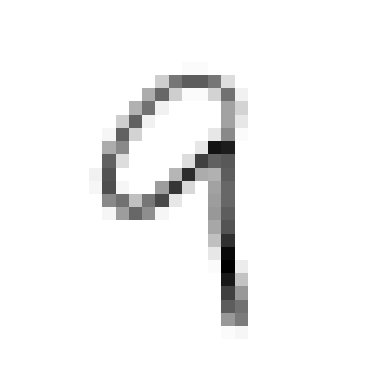

In [34]:
image_path = "/content/drive/MyDrive/mnist/src/images/image_9_1.jpg"
image = prepare_image(image_path)
image_to_show = image.squeeze()  # 去除多余的维度
plt.imshow(image_to_show, cmap='gray')
plt.axis("off")
plt.show()
# predicted_digit_from_epoch3 = predict(image_path, model_path_epoch3_MyNet)
# predicted_digit_from_epoch10 = predict(image_path, model_path_epoch10_MyNet)

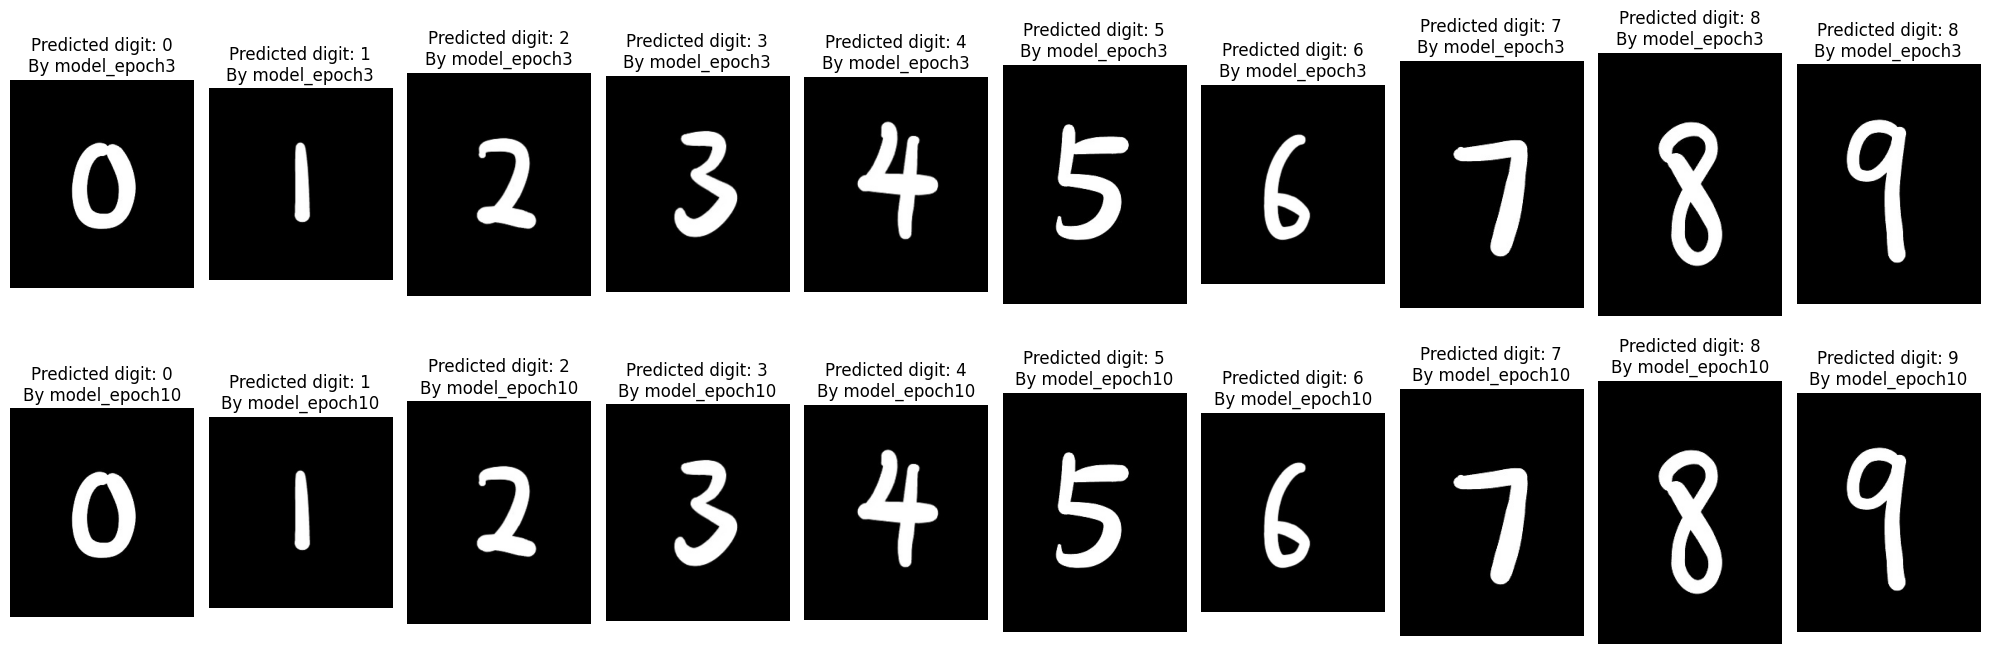

In [35]:
# 用看灰图来跑
image_paths = [f"/content/drive/MyDrive/mnist/src/images/imageblk_{i}.jpg" for i in range(10)]

fig, axes = plt.subplots(nrows=2, ncols=10, figsize=(20, 7)) # 图形+子图

for row in range(2):
  for col in range(10):
    ax = axes[row, col]
    image_path = image_paths[col]
    if row == 0:
      predicted_digit = predict(image_path, model_path_epoch3_MyNet)
    else:
      predicted_digit = predict(image_path, model_path_epoch10_MyNet)
    image = Image.open(image_path)
    ax.imshow(image, cmap='gray')
    ax.axis('off')
    if row == 0:
      ax.set_title(f"Predicted digit: {predicted_digit}\nBy model_epoch3")
    else:
      ax.set_title(f"Predicted digit: {predicted_digit}\nBy model_epoch10")

plt.tight_layout()
plt.show()

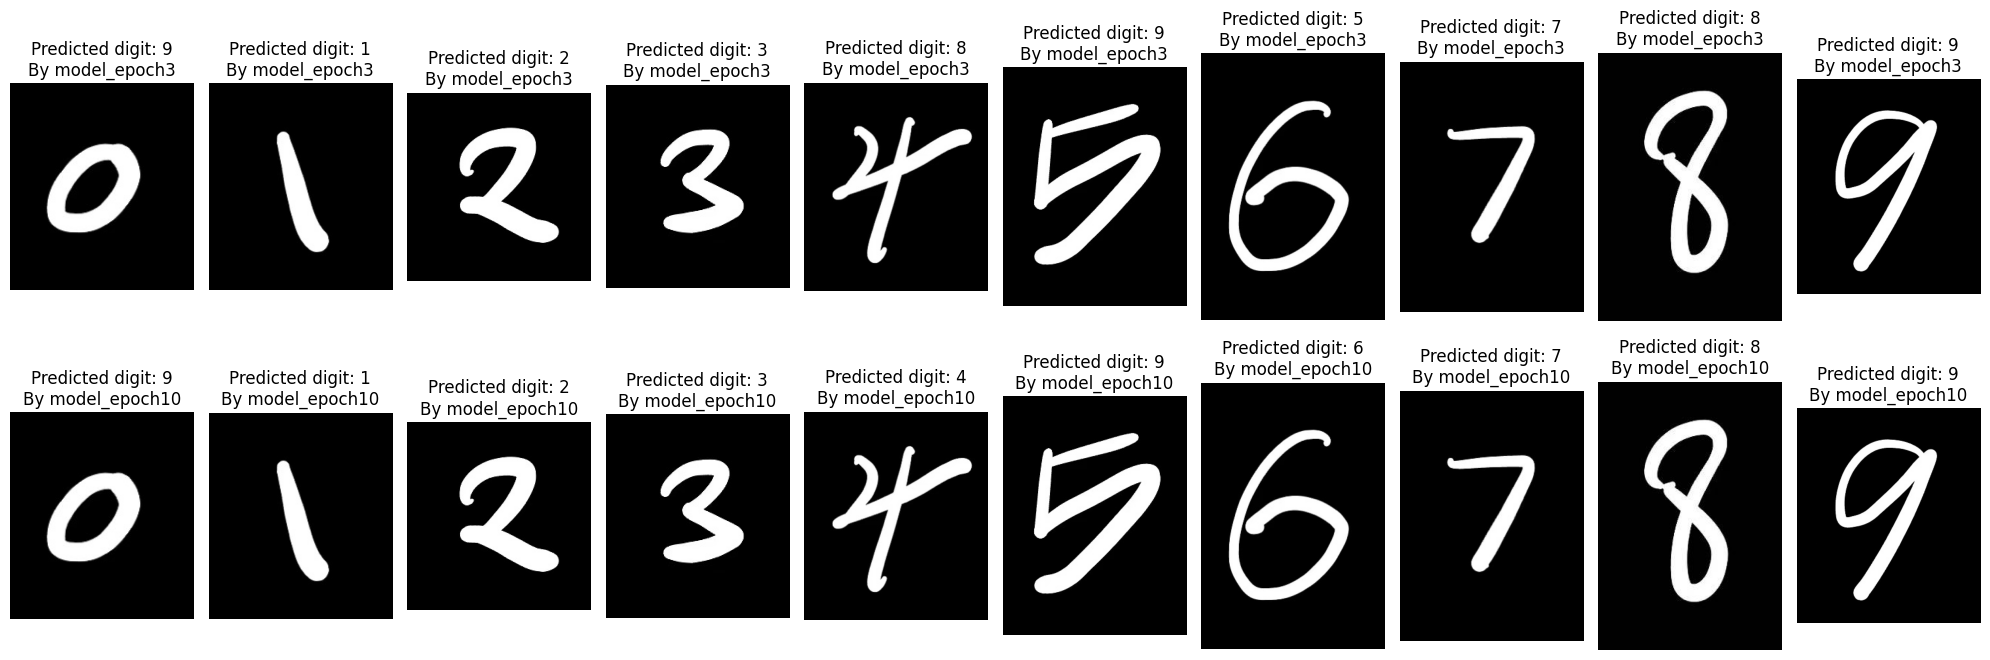

In [37]:
# 用看灰图来跑
image_paths = [f"/content/drive/MyDrive/mnist/src/images/{i}_2.jpg" for i in range(10)]

fig, axes = plt.subplots(nrows=2, ncols=10, figsize=(20, 7)) # 图形+子图

for row in range(2):
  for col in range(10):
    ax = axes[row, col]
    image_path = image_paths[col]
    if row == 0:
      predicted_digit = predict(image_path, model_path_epoch3_MyNet)
    else:
      predicted_digit = predict(image_path, model_path_epoch10_MyNet)
    image = Image.open(image_path)
    ax.imshow(image, cmap='gray')
    ax.axis('off')
    if row == 0:
      ax.set_title(f"Predicted digit: {predicted_digit}\nBy model_epoch3")
    else:
      ax.set_title(f"Predicted digit: {predicted_digit}\nBy model_epoch10")

plt.tight_layout()
plt.show()

# 测试白背景写黑字

In [38]:
# 加载并预处理图片
def prepare_image(image_path):
  transform = transforms.Compose([
      transforms.Grayscale(),
      transforms.Resize((28, 28)),
      transforms.ToTensor(),
      transforms.Normalize((0.1307,), (0.3081,)),
      transforms.Lambda(lambda x: 1.0 - x)  # 反转图像颜色
  ])
  image = Image.open(image_path)
  image = transform(image).unsqueeze(0) # 增加了一个维度 源图像只有(channels, height, width) ,这里加了一个batchsize变成模型期望的样子
  return image

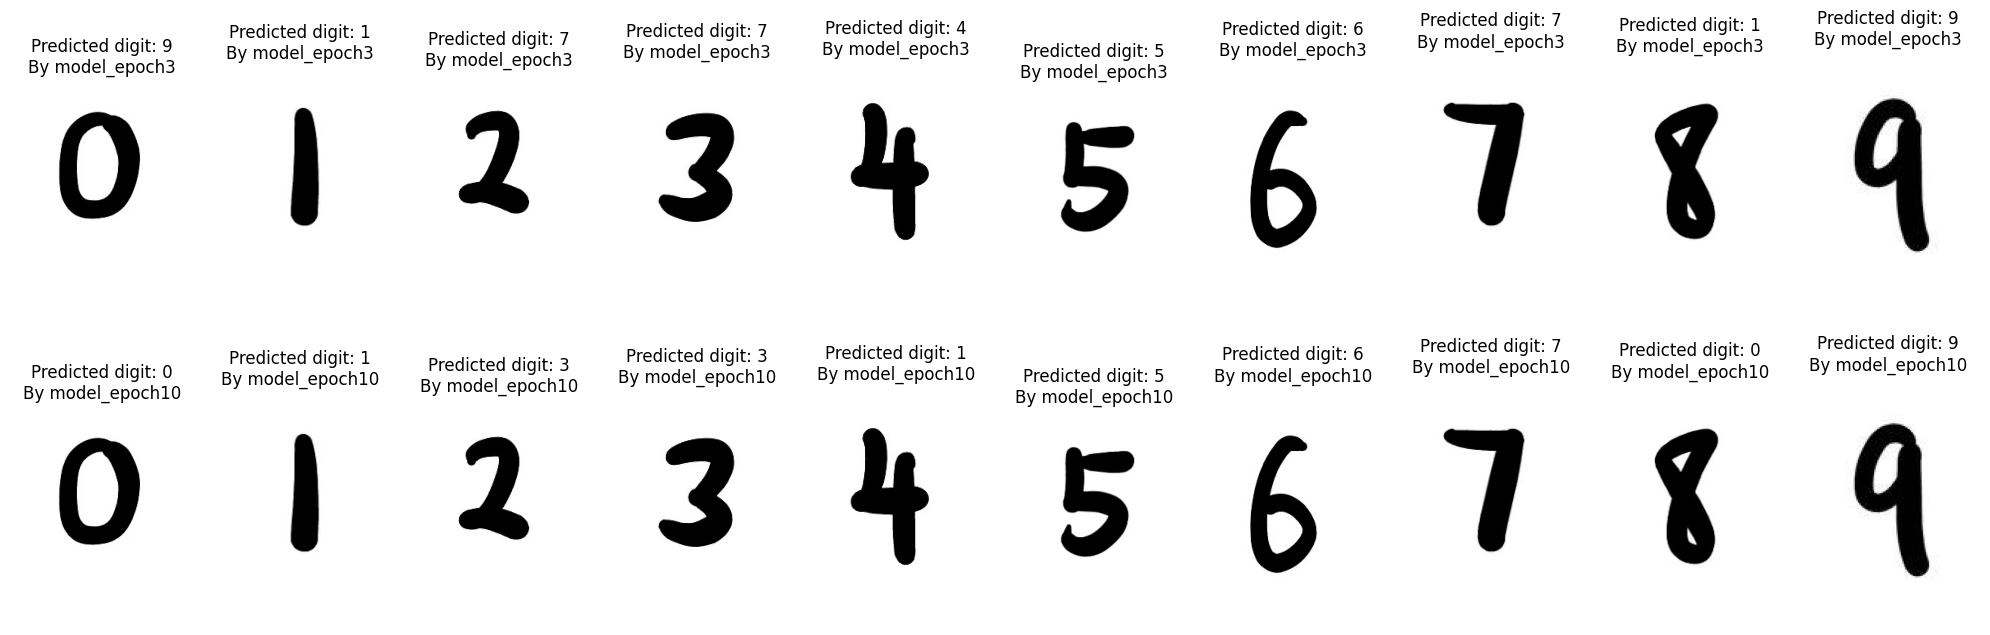

In [39]:
# 用看灰图来跑
image_paths = [f"/content/drive/MyDrive/mnist/src/images/white_{i}.jpg" for i in range(10)]

fig, axes = plt.subplots(nrows=2, ncols=10, figsize=(20, 7)) # 图形+子图

for row in range(2):
  for col in range(10):
    ax = axes[row, col]
    image_path = image_paths[col]
    if row == 0:
      predicted_digit = predict(image_path, model_path_epoch3_MyNet)
    else:
      predicted_digit = predict(image_path, model_path_epoch10_MyNet)
    image = Image.open(image_path)
    ax.imshow(image, cmap='gray')
    ax.axis('off')
    if row == 0:
      ax.set_title(f"Predicted digit: {predicted_digit}\nBy model_epoch3")
    else:
      ax.set_title(f"Predicted digit: {predicted_digit}\nBy model_epoch10")

plt.tight_layout()
plt.show()